# Chronic Kidney Disease

In [12]:
import pandas as pd
import ehrapy as ep
import ehrdata as ed
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [13]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [14]:
!wget -nc https://raw.githubusercontent.com/odsti/datasets/master/ckd/processed/ckd_full.csv

Nothing to do - goodbye


# Data Wrangling

In [15]:
data = pd.read_csv("ckd_full.csv")

Since the dataset does not have a patient ID we add one.

In [16]:
data["Patient_id"] = range(1, len(data) + 1)

We replace nomial feartures with integers.

In [17]:
data["Red Blood Cells"].replace(("normal", "abnormal"), (0, 1), inplace=True)
data["Pus Cell"].replace(("normal", "abnormal"), (0, 1), inplace=True)
data["Pus Cell clumps"].replace(("notpresent", "present"), (0, 1), inplace=True)
data["Bacteria"].replace(("notpresent", "present"), (0, 1), inplace=True)
data["Hypertension"].replace(("no", "yes"), (0, 1), inplace=True)
data["Diabetes Mellitus"].replace(("no", "yes"), (0, 1), inplace=True)
data["Coronary Artery Disease"].replace(("no", "yes"), (0, 1), inplace=True)
data["Appetite"].replace(("good", "poor"), (0, 1), inplace=True)
data["Pedal Edema"].replace(("no", "yes"), (0, 1), inplace=True)
data["Anemia"].replace(("no", "yes"), (0, 1), inplace=True)
data["Class"].replace(("notckd", "ckd"), (0, 1), inplace=True)

In [18]:
data.set_index("Patient_id", inplace=True)

In [19]:
data.to_csv("chronic_kidney_disease_prepared.csv")

## ehrapy sanity check

In [20]:
adata = ep.io.read_csv("chronic_kidney_disease_prepared.csv",
                   index_column="Patient_id")
edata = ed.EHRData.from_adata(adata=adata)

In [21]:
edata.var_names

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cell', 'Pus Cell clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Class'],
      dtype='object')

In [22]:
ep.ad.feature_type_overview(edata)

! Features 'Albumin', 'Sugar', 'Red Blood Cells', 'Pus Cell', 'Pus Cell clumps', 'Bacteria', 'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite', 'Pedal Edema', 'Anemia', 'Class' were detected as categorical features stored numerically.Please verify and correct using `ep.ad.replace_feature_types` if necessary.
! Feature types were inferred and stored in adata.var[feature_type]. Please verify using `ep.ad.feature_type_overview` and adjust if necessary using `ep.ad.replace_feature_types`.


 Detected feature types for AnnData object with 400 obs and 25 vars
╠══ 📅 Date features
╠══ 📐 Numerical features
║   ╠══ Age
║   ╠══ Blood Glucose Random
║   ╠══ Blood Pressure
║   ╠══ Blood Urea
║   ╠══ Hemoglobin
║   ╠══ Packed Cell Volume
║   ╠══ Potassium
║   ╠══ Red Blood Cell Count
║   ╠══ Serum Creatinine
║   ╠══ Sodium
║   ╠══ Specific Gravity
║   ╚══ White Blood Cell Count
╚══ 🗂️ Categorical features
    ╠══ Albumin (6 categories)
    ╠══ Anemia (2 categories)
    ╠══ Appetite (2 categories)
    ╠══ Bacteria (2 categories)
    ╠══ Class (2 categories)
    ╠══ Coronary Artery Disease (2 categories)
    ╠══ Diabetes Mellitus (2 categories)
    ╠══ Hypertension (2 categories)
    ╠══ Pedal Edema (2 categories)
    ╠══ Pus Cell (2 categories)
    ╠══ Pus Cell clumps (2 categories)
    ╠══ Red Blood Cells (2 categories)
    ╚══ Sugar (6 categories)

In [23]:
_ = ep.pp.qc_metrics(edata)

In [24]:
edata.obs

,missing_values_abs,missing_values_pct
Patient_id,,
1,3,12.0
2,5,20.0
3,3,12.0
4,0,0.0
5,2,8.0
...,...,...
396,0,0.0
397,0,0.0
398,0,0.0


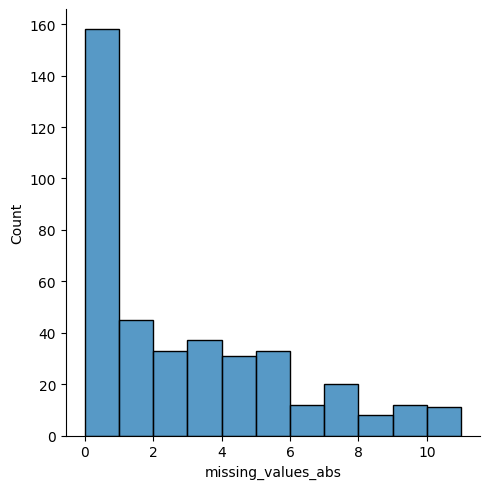

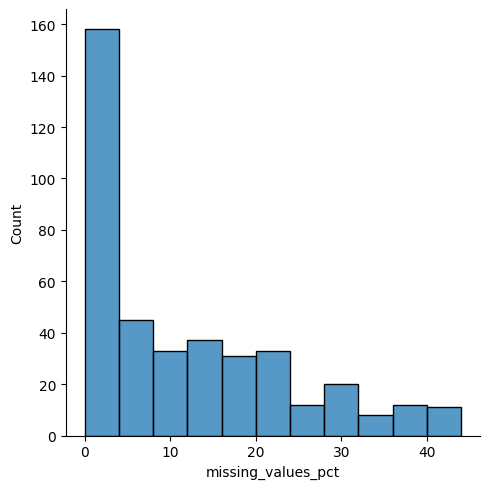

In [25]:
_ = sns.displot(edata.obs["missing_values_abs"])
plt.show()

_ = sns.displot(edata.obs["missing_values_pct"])

In [26]:
edata.var

,feature_type,missing_values_abs,missing_values_pct,mean,median,standard_deviation,min,max,iqr_outliers
Age,numeric,9,2.25,51.483376,55.00,17.147744,2.000,90.000000,True
Blood Pressure,numeric,12,3.00,76.469072,80.00,13.665993,50.000,180.000000,True
Specific Gravity,numeric,47,11.75,1.017408,1.02,0.005709,1.005,1.025000,False
Albumin,categorical,46,11.50,1.016949,0.00,1.350767,0.000,5.000000,False
Sugar,categorical,49,12.25,0.450142,0.00,1.097624,0.000,5.000000,True
Red Blood Cells,categorical,152,38.00,0.189516,0.00,0.391918,0.000,1.000000,True
Pus Cell,categorical,65,16.25,0.226866,0.00,0.418805,0.000,1.000000,True
Pus Cell clumps,categorical,4,1.00,0.106061,0.00,0.307915,0.000,1.000000,True
Bacteria,categorical,4,1.00,0.055556,0.00,0.229061,0.000,1.000000,True
Blood Glucose Random,numeric,44,11.00,148.036517,121.00,79.170285,22.000,490.000000,True


Output()

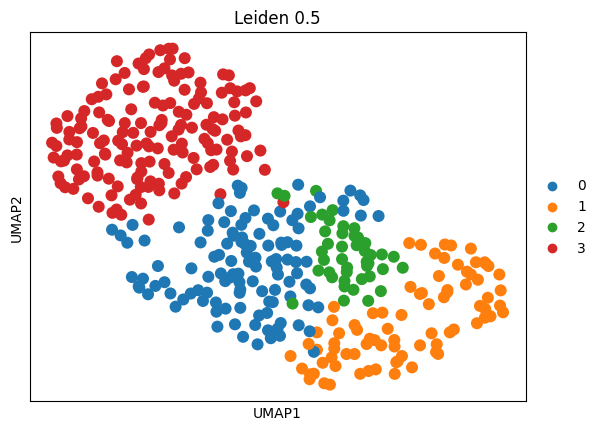

In [27]:
ep.pp.knn_impute(edata)
ep.pp.scale_norm(edata)
ep.pp.pca(edata)
ep.pp.neighbors(edata)
ep.tl.umap(edata)
ep.tl.leiden(edata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(edata, color=["leiden_0_5"], title="Leiden 0.5")

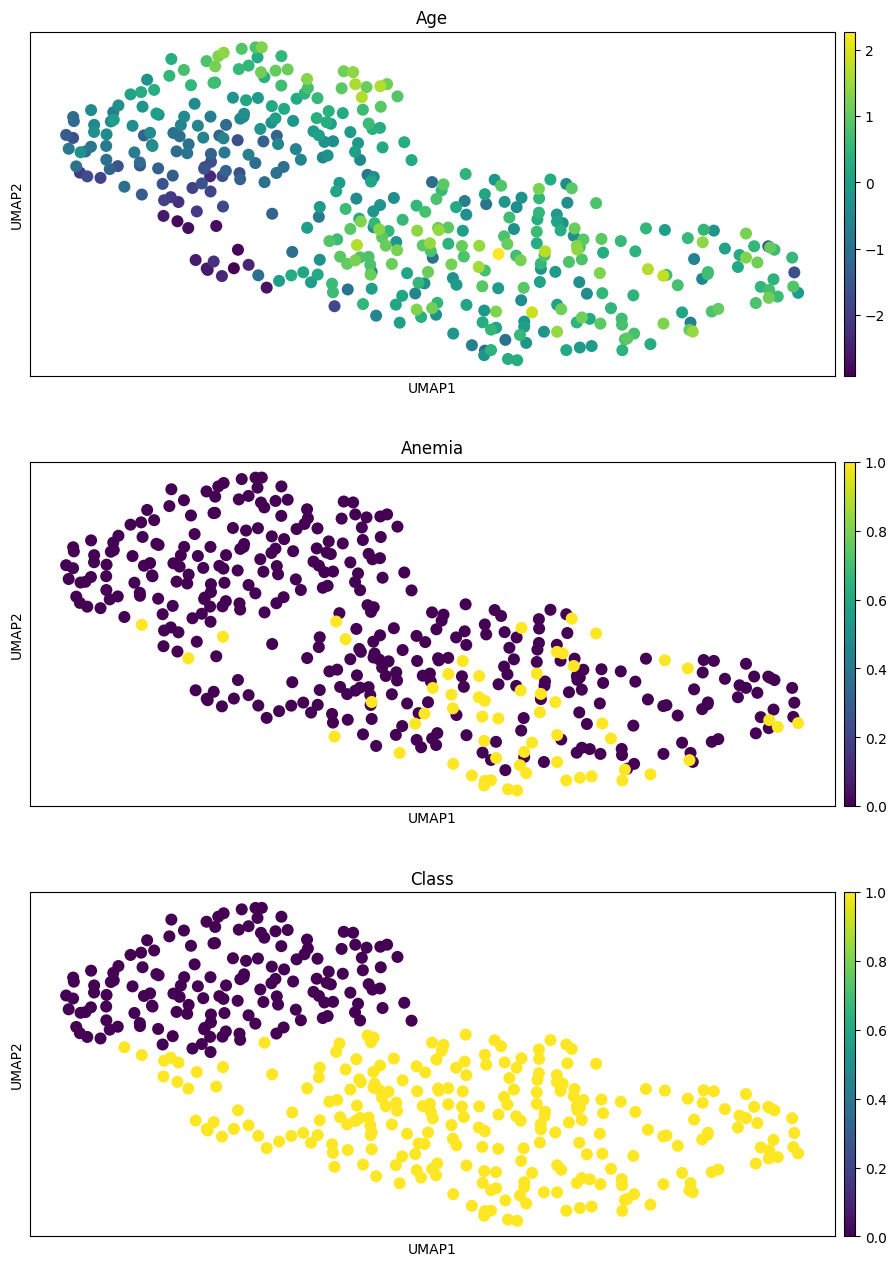

In [28]:
ep.pl.umap(edata, color=["Age", "Anemia", "Class",], ncols=1, wspace=0.75)